Beschrijving van de dataset

Deze dataset is kunstmatig gecreëerd en richt zich op het voorspellen van landbouwoogsten. Het simuleert omstandigheden op basis van diverse milieu- en managementfactoren. Het doel is het bieden van een oefenomgeving voor het ontwikkelen van voorspellende modellen in de context van landbouw, machine learning en regressieanalyse.

Dit Python-script maakt gebruik van de pandas-bibliotheek om de gegevens in te lezen vanuit het CSV-bestand genaamd "agricultural_yield_train.csv". De gegevens worden opgeslagen in de variabele `ay_data`. Door de `head()`-functie te gebruiken, worden de eerste paar rijen van de dataset weergegeven. Dit geeft een snel overzicht van de structuur en inhoud van de gegevens.

In [23]:
import pandas as pd

ay_data = pd.read_csv("../csv/agricultural_yield_train.csv")
ay_data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


Dit Python-script bereidt gegevens voor machine learning voor door features (`X`) en een targetvariabele (`y`) te definiëren. De features worden gedefinieerd als alle kolommen behalve `"Seed_Variety"` in het DataFrame `ay_data`, en de targetvariabele (`y`) wordt ingesteld op de kolom `"Seed_Variety"`.

In [24]:
X = ay_data.drop(["Seed_Variety"], axis=1)
y = ay_data["Seed_Variety"]

X, y

(       Soil_Quality  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
 0         96.415657                        147.853040   94.593926   
 1         92.352626                        281.565396   90.504644   
 2         63.714785                        137.864940   97.329340   
 3         90.084256                        100.946659  113.404828   
 4         81.600341                        223.088908   83.048176   
 ...             ...                               ...         ...   
 15995     77.053550                        154.189768  103.115855   
 15996     99.795631                        282.295839  123.598354   
 15997     67.478487                        120.017122  102.308627   
 15998     85.176890                        247.847389  114.956634   
 15999     87.838280                        244.216536   98.313738   
 
        Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
 0       444.267569                    3            683.759119  
 1       517.585491         

Dit Python-script maakt gebruik van de `train_test_split`-functie uit de scikit-learn bibliotheek om een dataset op te splitsen in training- en testsets. De features (`X`) en de bijbehorende targetvariabele (`y`) worden als invoer gegeven. De resulterende datasets, `X_train`, `X_test`, `y_train`, en `y_test`, worden gebruikt voor het trainen en evalueren van de modellen. De parameter `test_size=0.2` geeft aan dat 20% van de gegevens wordt toegewezen aan de testset, terwijl 80% wordt gebruikt voor training. De parameter `random_state=0` zorgt voor reproduceerbaarheid van de splitsing. Met toevoeging van `stratify=y` wordt de parameter `stratify` toegepast, wat betekent dat de verdeling van klassen in de targetvariabele (`y`) behouden blijft in zowel de training- als de testset. Dit is vooral relevant bij classificatietaken met ongebalanceerde datasets, waarbij het behoud van dezelfde klasseverdeling in beide sets belangrijk is om de representativiteit van de data te waarborgen.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


Dit codeblok maakt gebruik van GridSearchCV om de beste hyperparameters te vinden voor een Random Forest Classifier-model. Het grid van hyperparameters bevat verschillende waarden voor het aantal bomen `(n_estimators)` in het ensemble. Vervolgens wordt GridSearchCV gebruikt om het beste model te trainen en te valideren met behulp van 5-voudige cross-validation. Na het zoeken wordt het model geëvalueerd en worden de beste parameters en het beste model opgeslagen voor verdere analyse en gebruik.

**DIT CODE BLOK RUNT DE EERSTE KEER 6 MIN**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [1, 5, 10, 50, 100, 150, 200, 250, 500]
}

model_rf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid=param_grid_rf, cv=5)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_model_rf = grid_search_rf.best_estimator_

Deze code lijn maakt gebruik van het eerder getrainde Random Forest-classificatiemodel (`best_model_rf`) om voorspellingen te doen op de testdataset (`X_test`). De resulterende voorspellingen worden opgeslagen in de variabele `y_pred_rf`. Het doel is om de prestaties van het Random Forest-model te evalueren door de voorspellingen te vergelijken met de echte labels van de testdataset.

In [27]:
y_pred_rf = best_model_rf.predict(X_test)
y_pred_rf

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Deze code voert een grid search uit op een RandomForestClassifier om de beste waarde voor het aantal bomen `n_estimators` te bepalen. Het itereren over verschillende waarden van `n_estimators` en het trainen van het model voor elke waarde. Vervolgens wordt de nauwkeurigheid van elk getrainde model geëvalueerd op de testgegevens. Ten slotte wordt de beste waarde voor `n_estimators` afgedrukt, samen met de nauwkeurigheid van het model dat is getraind met deze optimale waarde.

**DIT CODE BLOK RUNT DE EERSTE KEER 2 MIN**

In [30]:
for n_estimators_value in param_grid_rf['n_estimators']:
    model_rf = RandomForestClassifier(n_estimators=n_estimators_value, random_state=0)
    model_rf.fit(X_train, y_train)
    accuracy_rf = model_rf.score(X_test, y_test)
    print(f"Accuracy for n_estimators={n_estimators_value}: {accuracy_rf}")


Accuracy for n_estimators=1: 0.9534375
Accuracy for n_estimators=5: 0.9825
Accuracy for n_estimators=10: 0.9878125
Accuracy for n_estimators=50: 0.989375
Accuracy for n_estimators=100: 0.99
Accuracy for n_estimators=150: 0.9896875
Accuracy for n_estimators=200: 0.9903125
Accuracy for n_estimators=250: 0.9896875
Accuracy for n_estimators=500: 0.99


Dit codeblok visualiseert de  belangrijkheid van elke functie in de dataset voor een Random Forest-model. Het gebruikt de `feature_importances_` attribuut om de bijdrage van elke functie aan de voorspellende kracht van het model weer te geven. De hoogte van de staafdiagrammen geeft de mate van belangrijkheid van elke functie aan, waardoor het gemakkelijk is om te zien welke functies significant zijn voor het model. Bovendien laat het alleen de best presterende `n_estimators` zien in de plot.

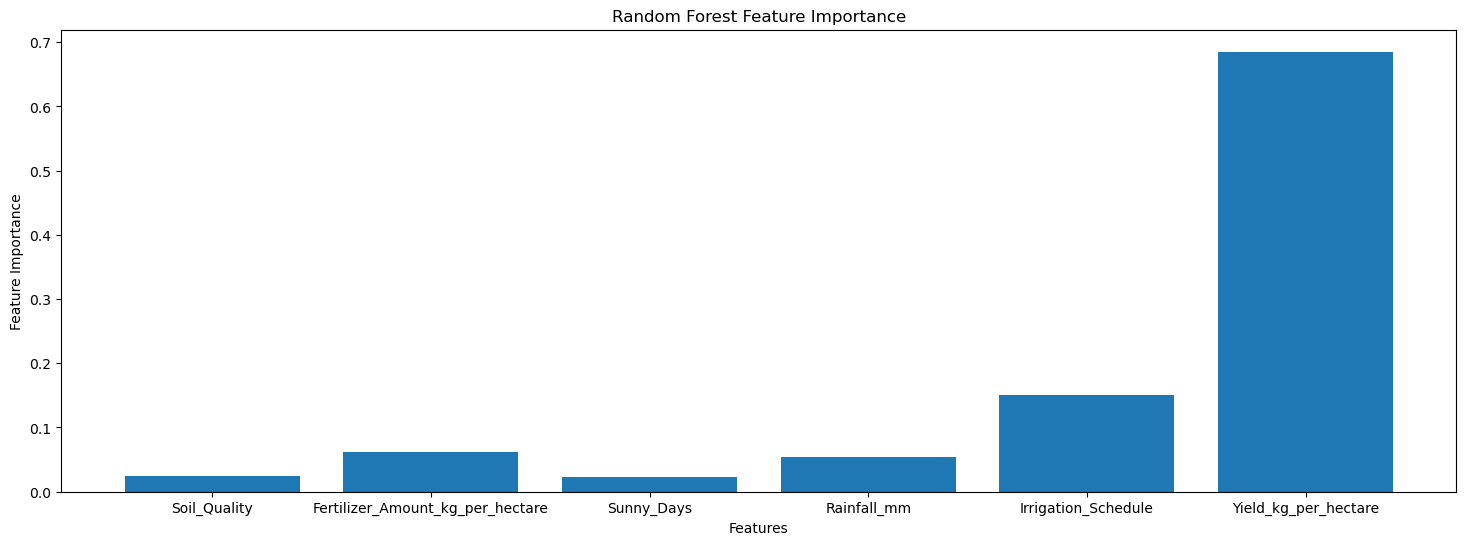

In [29]:
import matplotlib.pyplot as plt

feature_importances = best_model_rf.feature_importances_
plt.figure(figsize=(18, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Conclusie

- `n_estimators_value` 1: Nauwkeurigheid van 94,9±%
- `n_estimators_value` 5: Nauwkeurigheid van 98,3±%
- `n_estimators_value` 10: Nauwkeurigheid van 98,8±%
- `n_estimators_value` 50: Nauwkeurigheid van 99,0±%
- `n_estimators_value` 100: Nauwkeurigheid van 99,0±%
- `n_estimators_value` 150: Nauwkeurigheid van 99,1±%
- `n_estimators_value` 200: Nauwkeurigheid van 99,1±%
- `n_estimators_value` 250: Nauwkeurigheid van 99,0±%
- `n_estimators_value` 500: Nauwkeurigheid van 99,0±%

Het gebruik van stratificatie `(stratify=y)` bij het splitsen van de gegevens in trainings- en testsets heeft invloed gehad op de nauwkeurigheidsresultaten. Deze strategie zorgt voor een gebalanceerde verdeling van de klassen in zowel de trainings- als testgegevens, waardoor een meer representatieve evaluatie van het model mogelijk is.

Na analyse van de nauwkeurigheidsresultaten van het Random Forest-model met verschillende aantallen bomen (`n_estimators`), kunnen we de volgende conclusies trekken:

- Bij een laag aantal bomen, zoals 1, is de nauwkeurigheid 94,9%, wat een redelijke prestatie is maar waarschijnlijk verbeterd kan worden met meer bomen.

- Met 5 bomen stijgt de nauwkeurigheid tot 98,3%, wat een aanzienlijke verbetering is ten opzichte van slechts één boom.

- De nauwkeurigheid blijft toenemen met het aantal bomen, waarbij een stabilisatie wordt waargenomen rond 99,0% na ongeveer 50 bomen.

- Het lijkt erop dat verdere toename in het aantal bomen boven de 50 leidt tot marginale verbeteringen in nauwkeurigheid, met de nauwkeurigheid die rond de 99,0-99,1% blijft schommelen.

- Bij hogere aantallen bomen, zoals 250 en 500, wordt geen verdere substantiële verbetering in nauwkeurigheid waargenomen, wat aangeeft dat het model een zekere mate van stabiliteit heeft bereikt.

Over het algemeen kunnen we concluderen dat het model profiteert van het toevoegen van bomen tot ongeveer 50, waarna verdere toename in het aantal bomen leidt tot marginale verbeteringen.

Naast de analyse van de nauwkeurigheidsresultaten is het van belang om naar de feature importances te kijken. Hieruit blijkt dat `yield_kg_per_hectare` de hoogste invloed heeft op de voorspellingen, gevolgd door andere kenmerken zoals `irrigation_schedule`, `rainfall_mm`, `fertilizer_amount_kg_per_hectare`, `soil_quality`, en `sunny_days`. 

Deze bevindingen onderstrepen dat niet alleen het aantal bomen (`n_estimators`) van belang is voor het model, maar ook de kwaliteit en relevantie van individuele kenmerken. Het model leert sterk van variaties in `yield_kg_per_hectare`, wat logisch is gezien dit het beoogde voorspelde kenmerk is.

In conclusie, naast het optimaliseren van het aantal bomen, benadrukt de analyse van feature importances het belang van begrip van de invloed van individuele kenmerken voor een betere interpretatie van het Random Forest-model.